## Autoreload

Autoreload allows the notebook to dynamically load code: if we update some helper functions *outside* of the notebook, we do not need to reload the notebook.

In [238]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [239]:
# All auxiliary code is in ../src

import sys

sys.path.append("../src/")

# Data understanding

As first thing we imported all necessary modules

In [240]:
import pandas as pd

Then we load our dataset

In [241]:
races = pd.read_csv('../dataset/races.csv', sep=",")

In [242]:
races.dtypes

_url                    object
name                    object
points                 float64
uci_points             float64
length                 float64
climb_total            float64
profile                float64
startlist_quality        int64
average_temperature    float64
date                    object
position                 int64
cyclist                 object
cyclist_age            float64
is_tarmac                 bool
is_cobbled                bool
is_gravel                 bool
cyclist_team            object
delta                  float64
dtype: object

Diamo una prima occhiata ai valori mancanti nulli

In [243]:
races[races.isnull().any(axis=1)]

_url            name  points  uci_points  \
0       tour-de-france/1978/stage-6  Tour de France   100.0         NaN   
1       tour-de-france/1978/stage-6  Tour de France   100.0         NaN   
2       tour-de-france/1978/stage-6  Tour de France   100.0         NaN   
3       tour-de-france/1978/stage-6  Tour de France   100.0         NaN   
4       tour-de-france/1978/stage-6  Tour de France   100.0         NaN   
...                             ...             ...     ...         ...   
589860   giro-d-italia/2010/stage-1   Giro d'Italia    80.0        16.0   
589861   giro-d-italia/2010/stage-1   Giro d'Italia    80.0        16.0   
589862   giro-d-italia/2010/stage-1   Giro d'Italia    80.0        16.0   
589863   giro-d-italia/2010/stage-1   Giro d'Italia    80.0        16.0   
589864   giro-d-italia/2010/stage-1   Giro d'Italia    80.0        16.0   

          length  climb_total  profile  startlist_quality  \
0       162000.0       1101.0      1.0               1241   
1       162000.0       1101.0      1.0               1241   
2       162000.0       1101.0      1.0               1241   
3       162000.0       1101.0      1.0               1241   
4       162000.0       1101.0      1.0               1241   
...          ...          ...      ...                ...   
589860    8400.0         60.0      1.0                878   
589861    8400.0         60.0      1.0                878   
589862    8400.0         60.0      1.0                878   
589863    8400.0         60.0      1.0                878   
589864    8400.0         60.0      1.0                878   

        average_temperature                 date  position  \
0                       NaN  1978-07-05 04:02:24         0   
1                       NaN  1978-07-05 04:02:24         1   
2                       NaN  1978-07-05 04:02:24         2   
3                       NaN  1978-07-05 04:02:24         3   
4                       NaN  1978-07-05 04:02:24         4   
...                     ...                  ...       ...   
589860                  NaN  2010-05-08 00:11:38       192   
589861                  NaN  2010-05-08 00:11:40       193   
589862                  NaN  2010-05-08 00:11:41       194   
589863                  NaN  2010-05-08 00:11:48       195   
589864                  NaN  2010-05-08 00:11:49       196   

                   cyclist  cyclist_age  is_tarmac  is_cobbled  is_gravel  \
0               sean-kelly         22.0       True       False      False   
1         gerrie-knetemann         27.0       True       False      False   
2           rene-bittinger         24.0       True       False      False   
3           joseph-bruyere         30.0       True       False      False   
4         sven-ake-nilsson         27.0       True       False      False   
...                    ...          ...        ...         ...        ...   
589860       anders-lund-1         25.0       True       False      False   
589861  andrea-masciarelli         28.0       True       False      False   
589862         marco-corti         24.0       True       False      False   
589863       robbie-mcewen         38.0       True       False      False   
589864     martin-pedersen         27.0       True       False      False   

                                cyclist_team  delta  
0       vini-ricordi-pinarello-sidermec-1986    0.0  
1                                norway-1987    0.0  
2                                        NaN    0.0  
3                   navigare-blue-storm-1993    0.0  
4                                 spain-1991    0.0  
...                                      ...    ...  
589860                      watney-avia-1972   80.0  
589861                                   NaN   82.0  
589862                       kazakhstan-2001   83.0  
589863   radio-popular-paredes-boavista-2023   90.0  
589864                       kazakhstan-2001   91.0  

[562279 rows x 18 columns]

### Dataframe with only race attributes

In [244]:
cyclist_races_columns = ['position', 'cyclist', 'cyclist_age', 'cyclist_team', 'delta', 'date']
races_columns = [col for col in races.columns if col not in cyclist_races_columns]
races_data = races.drop_duplicates(subset=races_columns)[races_columns].reset_index(drop=True)

Come prima cosa distingurei i valori delle singole corse con i dati relativi ai ciclisti della corsa per cercare di rimuovere ridondanza dei dati che potrebbe falsare le nostre distribuzioni a favore dei valori delle corse con più ciclisti -> separiamo in due tabelle normalizzate

### Histograms Plotting

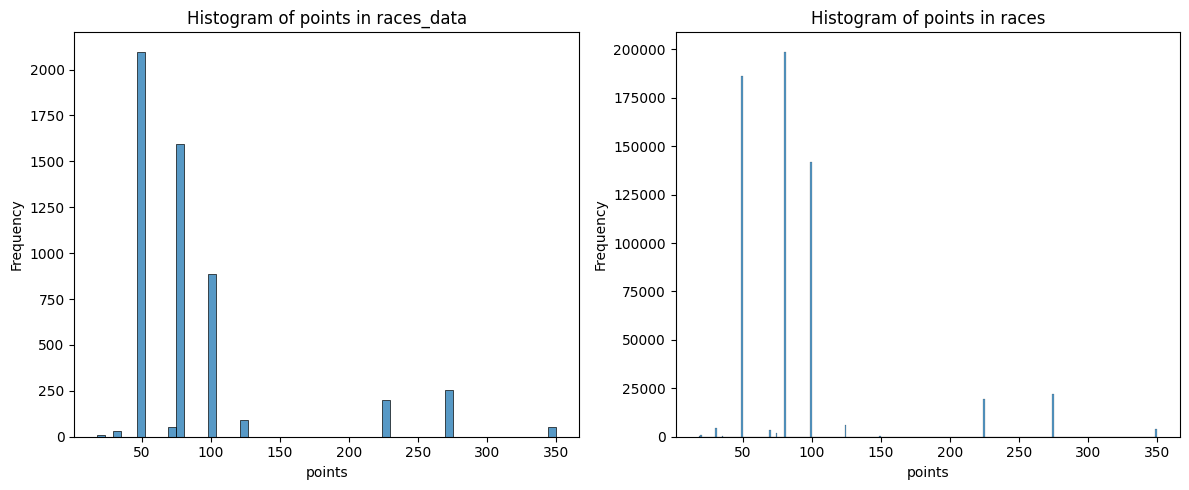

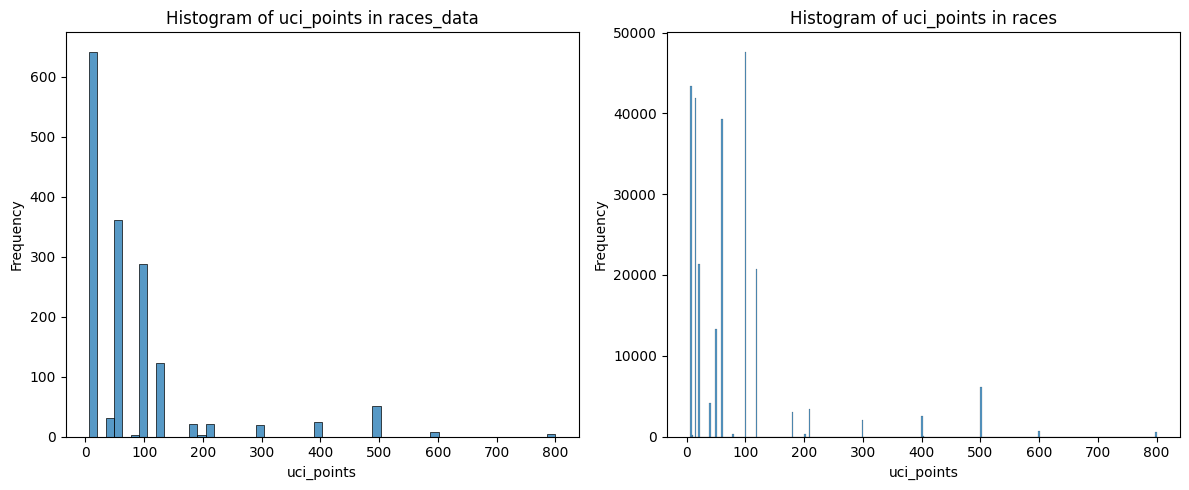

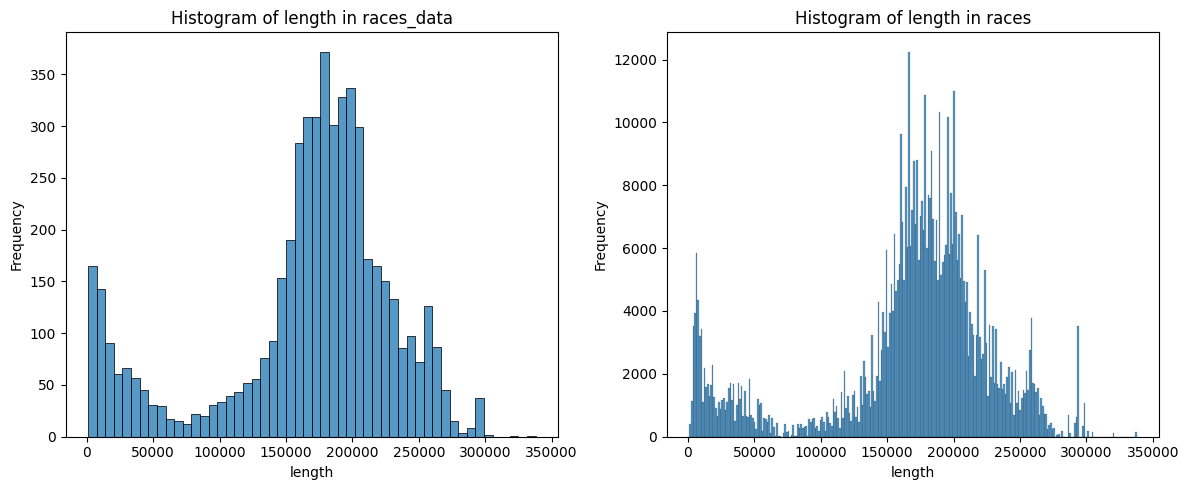

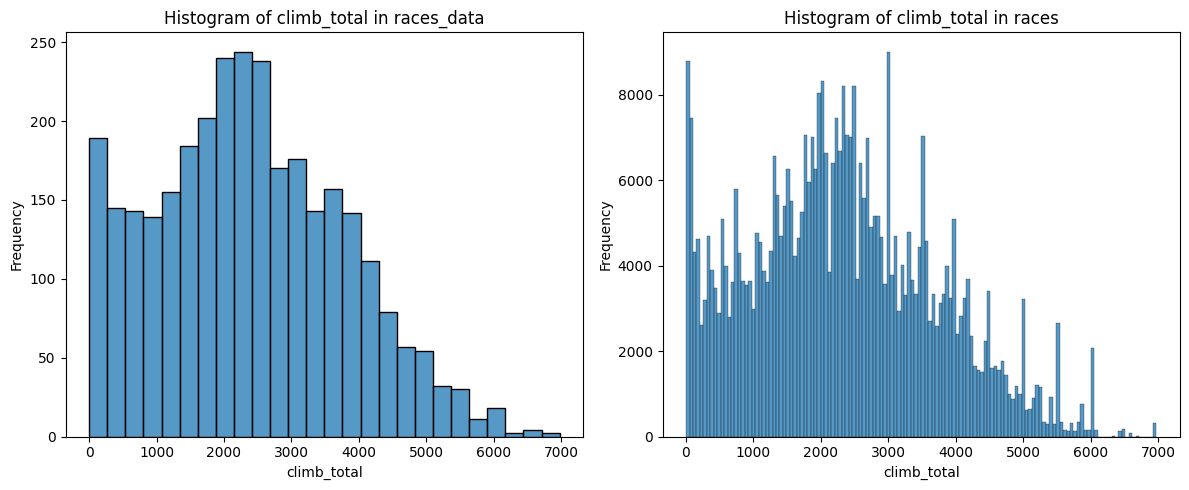

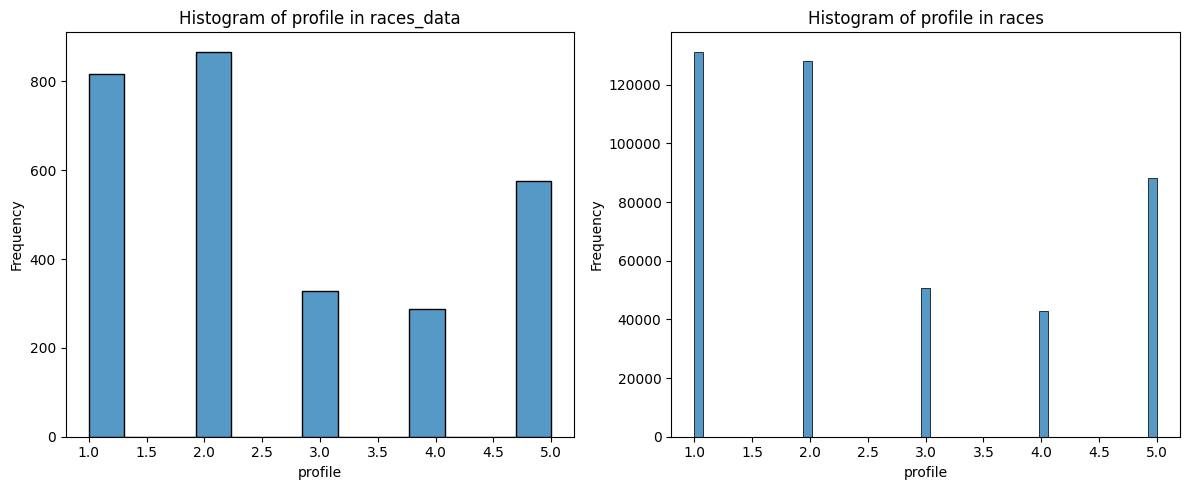

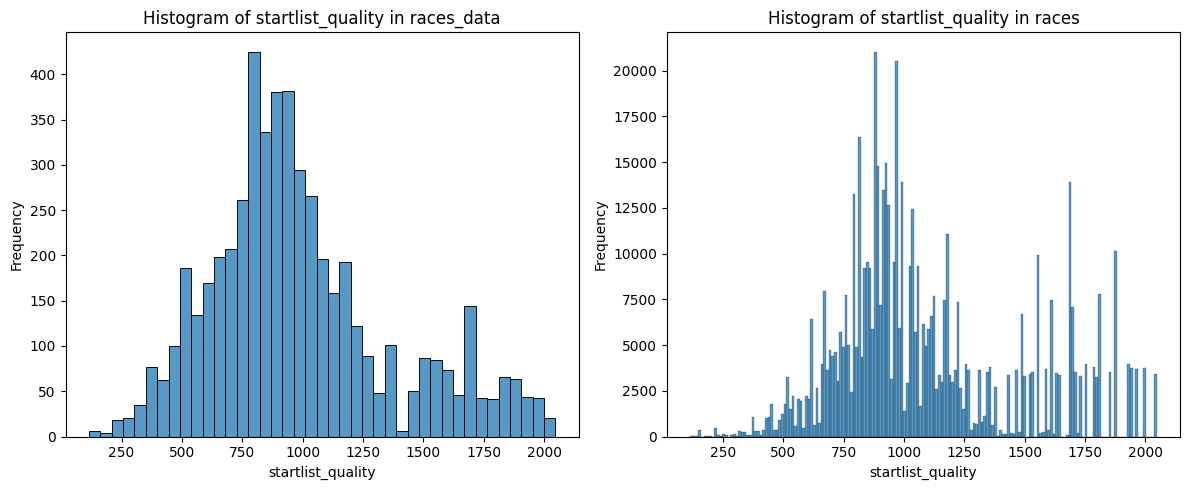

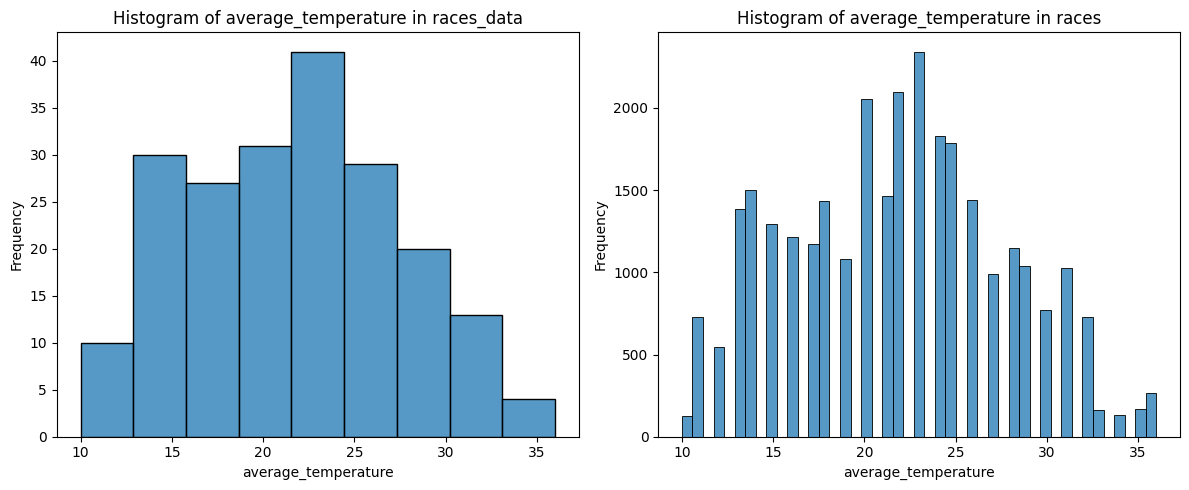

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt


for feature in races_data.select_dtypes(include="number").columns: 
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Istogramma per races_data
    sns.histplot(races_data[feature], ax=axes[0])
    axes[0].set_title(f'Histogram of {feature} in races_data')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    # Istogramma per races
    sns.histplot(races[feature], ax=axes[1])
    axes[1].set_title(f'Histogram of {feature} in races')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()  # Per evitare sovrapposizioni
    plt.show()

# Stats on attributes

In [246]:
from matplotlib import pyplot as plt
import numpy as np


def stats(column, box=False):
    print(f"Description of attribute '{column.name}':")
    display(column.describe())
    print("\nUnique values:")
    print(column.unique())
    print(f"\nNumber of null values: {column.isnull().sum()}")
    mv = column.isna().sum()
    nrec = races.shape[0]
    per=mv*100/nrec
    print(f"\n{mv} null values over {nrec} records - ({per:.2f}%)")
    print("\nTop 5 common value:" + "\n"+str(column.value_counts().head()))
    
   
    if box:
        boxplot_dict = plt.boxplot(column[~np.isnan(column)])
        # Recover Outliers
        outliers = [flier.get_ydata() for flier in boxplot_dict['fliers']]
        # Print outliers
        outliers_values = [value for sublist in outliers for value in sublist]
        print("\nOutliers:", outliers_values)

Age

Ci accorgiamo che il 13-enne è un errore perchè le gare ammettono maggiorenni. Il 56-enne è un outliers. Controllare i valori al di fuori della coda del boxplot

Description of attribute 'cyclist_age':


count    589752.000000
mean         28.486208
std           3.855631
min          13.000000
25%          26.000000
50%          28.000000
75%          31.000000
max          56.000000
Name: cyclist_age, dtype: float64


Unique values:
[22. 27. 24. 30. 26. 36. 23. 32. 31. 28. 29. 21. 25. 35. 38. 39. 34. 37.
 33. 40. 20. 19. nan 42. 41. 44. 43. 45. 56. 13.]

Number of null values: 113

113 null values over 589865 records - (0.02%)

Top 5 common value:
cyclist_age
27.0    58897
26.0    57921
28.0    56213
25.0    54346
29.0    52616
Name: count, dtype: int64

Outliers: [np.float64(13.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(40.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(40.0), np.float64(40.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(42.0), np.float64(41.0), np.float64(39.0), np.float64(40.0), np.float64(42.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(40.0), np.float64(39.0), np.float64(39.0), np.float64(40.0), np.float64(39.0

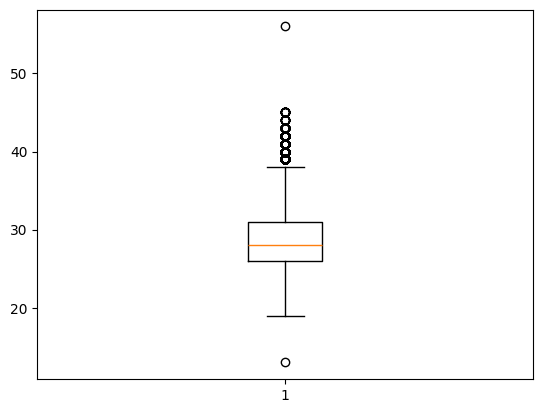

In [247]:
stats(races["cyclist_age"], box=True)

Url

In [248]:
stats(races["_url"])

Description of attribute '_url':


count                          589865
unique                           5281
top       tour-de-france/1986/stage-1
freq                              210
Name: _url, dtype: object


Unique values:
['tour-de-france/1978/stage-6' 'vuelta-a-espana/2016/stage-14'
 'tour-de-france/2019/stage-21' ... 'paris-nice/1976/stage-2'
 'volta-a-catalunya/2016/stage-7' 'giro-d-italia/2010/stage-1']

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
_url
tour-de-france/1986/stage-1     210
tour-de-france/1986/prologue    210
tour-de-france/1987/prologue    207
tour-de-france/1987/stage-1     206
giro-d-italia/2011/stage-2      206
Name: count, dtype: int64


Name

In [249]:
stats(races["name"])

Description of attribute 'name':


count             589865
unique                61
top       Tour de France
freq              145500
Name: name, dtype: object


Unique values:
['Tour de France' 'Vuelta a España' 'Volta Ciclista a Catalunya'
 'Paris - Nice' 'Tirreno-Adriatico' 'Critérium du Dauphiné Libéré'
 'Critérium du Dauphiné' 'Ronde van Vlaanderen / Tour des Flandres'
 'Milano-Sanremo' 'Tour de Suisse' "Giro d'Italia" 'Gran Camiño'
 'Tour de Romandie' 'Volta a Catalunya' 'La Vuelta ciclista a España'
 'La Flèche Wallonne' 'E3-Prijs Harelbeke' 'Vuelta al País Vasco'
 'Vuelta Ciclista al País Vasco' 'Liège - Bastogne - Liège'
 'Paris-Roubaix' 'UAE Tour' 'World Championships ME - Road Race'
 'Amstel Gold Race' 'Dwars door België / À travers la Belgique'
 'Itzulia Basque Country' 'World Championships - Road Race'
 'Criterium du Dauphiné Libére' 'Omloop Het Volk'
 'Clasica Ciclista San Sebastian' 'Paris - Roubaix' 'Strade Bianche'
 'Giro di Lombardia' 'Criterium du Dauphiné' 'O Gran Camiño'
 'Grand Prix Cycliste de Quebec' 'Grand Prix Cycliste de Montréal'
 'Ronde van Vlaanderen - Tour des Flandres ME'
 'Dwars door Vlaanderen - A travers la F

Description of attribute 'points':


count    589388.000000
mean         89.221635
std          54.435330
min          18.000000
25%          50.000000
50%          80.000000
75%         100.000000
max         350.000000
Name: points, dtype: float64


Unique values:
[100.  80.  50. 275.  20. 225. 125. 350.  75.  70.  30. 150.  35.  nan
  18.]

Number of null values: 477

477 null values over 589865 records - (0.08%)

Top 5 common value:
points
80.0     198878
50.0     186102
100.0    141706
275.0     22299
225.0     19536
Name: count, dtype: int64

Outliers: [np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), np.float64(275.0), n

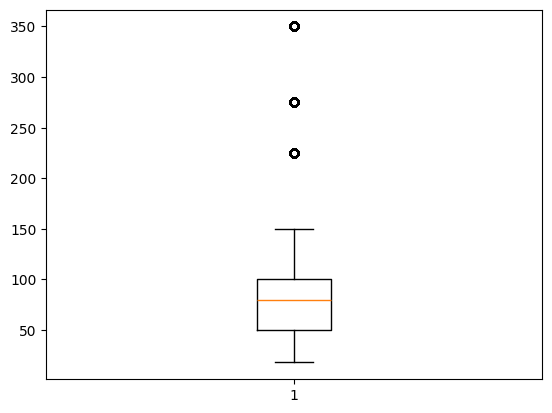

In [250]:
stats(races["points"], box=True)

Description of attribute 'uci_points':


count    251086.000000
mean         74.601547
std         100.947962
min           6.000000
25%          16.000000
50%          60.000000
75%         100.000000
max         800.000000
Name: uci_points, dtype: float64


Unique values:
[ nan 100. 120.  50.  60.   6.  14.  16. 500.  20.  40. 210. 400. 300.
 800. 180. 200. 600.  80.  10. 402.]

Number of null values: 338779

338779 null values over 589865 records - (57.43%)

Top 5 common value:
uci_points
100.0    47640
6.0      43390
16.0     41103
60.0     39317
20.0     21303
Name: count, dtype: int64

Outliers: [np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.

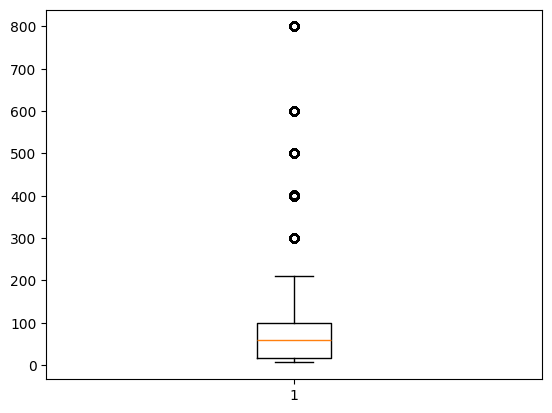

In [251]:
stats(races["uci_points"], box=True)

Description of attribute 'length':


count    589865.000000
mean     166776.180584
std       64545.605664
min        1000.000000
25%      152500.000000
50%      178200.000000
75%      203500.000000
max      338000.000000
Name: length, dtype: float64


Unique values:
[162000. 196000. 128000. ... 301000. 184200. 136400.]

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
length
177000.0    5039
170000.0    4717
195000.0    4413
200000.0    4401
178000.0    4286
Name: count, dtype: int64

Outliers: [np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float64(8100.0), np.float

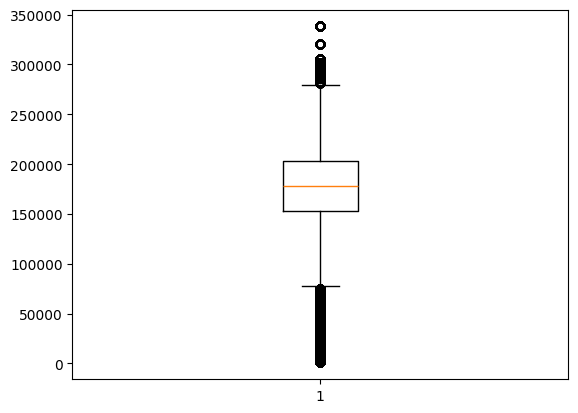

In [252]:
stats(races["length"], box=True)

Description of attribute 'climb_total':


count    442820.000000
mean       2330.469215
std        1375.710722
min           2.000000
25%        1309.000000
50%        2255.000000
75%        3273.000000
max        6974.000000
Name: climb_total, dtype: float64


Unique values:
[1101. 5575.  781. ...  713. 1441.   60.]

Number of null values: 147045

147045 null values over 589865 records - (24.93%)

Top 5 common value:
climb_total
3500.0    3762
2500.0    3261
4000.0    3029
3000.0    2938
5000.0    2592
Name: count, dtype: int64

Outliers: [np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(6939.0), np.float64(693

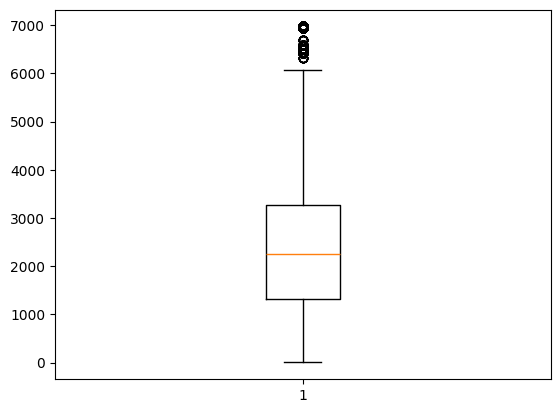

In [253]:
stats(races["climb_total"], box=True)

Description of attribute 'uci_points':


count    251086.000000
mean         74.601547
std         100.947962
min           6.000000
25%          16.000000
50%          60.000000
75%         100.000000
max         800.000000
Name: uci_points, dtype: float64


Unique values:
[ nan 100. 120.  50.  60.   6.  14.  16. 500.  20.  40. 210. 400. 300.
 800. 180. 200. 600.  80.  10. 402.]

Number of null values: 338779

338779 null values over 589865 records - (57.43%)

Top 5 common value:
uci_points
100.0    47640
6.0      43390
16.0     41103
60.0     39317
20.0     21303
Name: count, dtype: int64

Outliers: [np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.float64(500.0), np.

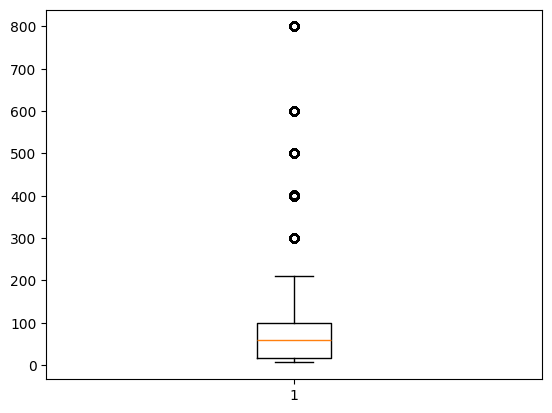

In [254]:
stats(races["uci_points"], box=True)

Description of attribute 'profile':


count    441671.000000
mean          2.611611
std           1.491741
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           5.000000
Name: profile, dtype: float64


Unique values:
[ 1.  5. nan  3.  2.  4.]

Number of null values: 148194

148194 null values over 589865 records - (25.12%)

Top 5 common value:
profile
1.0    131344
2.0    128269
5.0     88203
3.0     50844
4.0     43011
Name: count, dtype: int64

Outliers: []


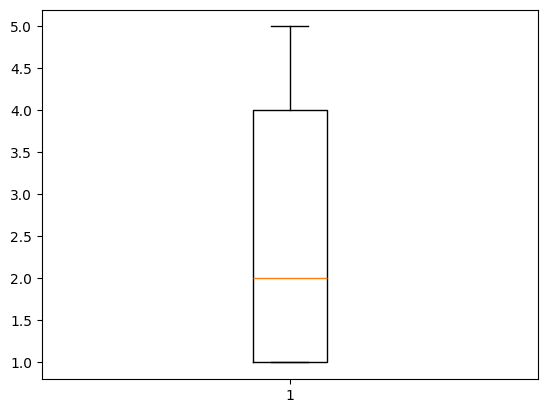

In [255]:
stats(races["profile"], box=True) # ? occhio a media su categorico

Description of attribute 'startlist_quality':


count    589865.000000
mean       1101.161178
std         380.586928
min         115.000000
25%         844.000000
50%         988.000000
75%        1309.000000
max        2047.000000
Name: startlist_quality, dtype: float64


Unique values:
[1241  821 1699  804 1551  899  659  388  900  541  830  789  602  817
 1400 1161 1040  896  791  819  670  225  520 1057  809  828  722  747
  714  815  376  621  760  798  933 1994 1437 1362  884 1150  971  881
 1112 1175  891  878  400  936  692  727 1002  928 1196 1489  687  585
  835  673 1328  885  502  861  982  923 1036 1690  925  989 1109 1084
  803  792  548  668 1713 1520 1959  883  859 2047 1024  533 1269  751
 1202  570 1703 1416  251 1158 1139  657 1048  521 1034 1099  880 1029
  627  340  767  737 1220  824  369 1255 1019  995 1059 1342  968  676
 1381  705  680  779 1123 1020 1632 1251 1470  708  892  523  590  604
  781  614 1309  951 1812  877 1758  843 1041 1646  935  660  961 1238
 1496  765  494 1933  956 1849 1136  393  882  597  874  908  888  530
 1089  446  838  373 1872  638  794  932 1331  377  719 1121 1042 1165
 1105 1535 1492  732  866  920  917 1584  653  906  551  611  772  852
  607 1177  389  873  966  775  790 1090  302  478  952 1176 

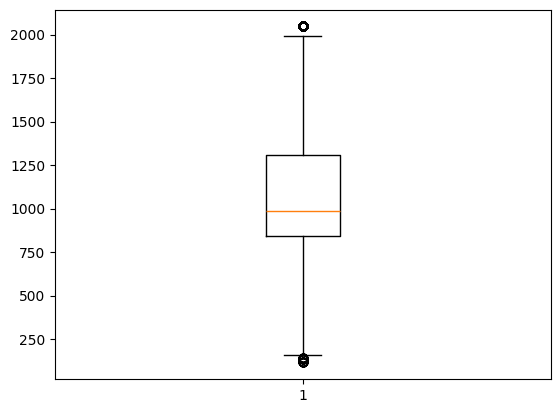

In [256]:
stats(races["startlist_quality"], box=True)

Description of attribute 'average_temperature':


count    29933.000000
mean        21.731768
std          5.884761
min         10.000000
25%         17.000000
50%         22.000000
75%         26.000000
max         36.000000
Name: average_temperature, dtype: float64


Unique values:
[nan 24. 22. 13. 10. 19. 29. 20. 11. 25. 15. 23. 31. 21. 27. 32. 16. 14.
 26. 30. 28. 18. 17. 34. 12. 35. 36. 33.]

Number of null values: 559932

559932 null values over 589865 records - (94.93%)

Top 5 common value:
average_temperature
23.0    2343
22.0    2099
20.0    2055
24.0    1829
25.0    1789
Name: count, dtype: int64

Outliers: []


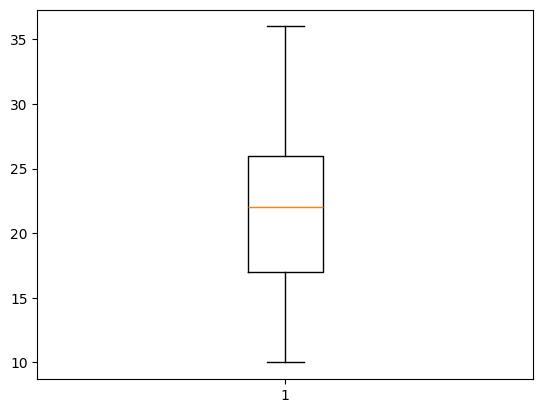

In [257]:
stats(races["average_temperature"], box=True)

In [258]:
stats(races["date"])

Description of attribute 'date':


count                  589865
unique                 140509
top       1986-07-05 01:58:44
freq                      203
Name: date, dtype: object


Unique values:
['1978-07-05 04:02:24' '1978-07-05 04:02:51' '1978-07-05 04:03:28' ...
 '2010-05-08 00:11:41' '2010-05-08 00:11:48' '2010-05-08 00:11:49']

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
date
1986-07-05 01:58:44    203
1987-07-05 01:50:51    200
2013-06-29 04:56:52    198
1988-07-05 04:52:08    197
2009-08-31 04:41:01    195
Name: count, dtype: int64


In [259]:
stats(races["position"]) # ordinale numerico come gestirlo?

Description of attribute 'position':


count    589865.000000
mean         74.219491
std          48.404023
min           0.000000
25%          32.000000
50%          70.000000
75%         112.000000
max         209.000000
Name: position, dtype: float64


Unique values:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209]

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
position
0    5281
1    5275
2    5273


In [260]:
stats(races["cyclist"])

Description of attribute 'cyclist':


count             589865
unique              6095
top       matteo-tosatto
freq                 959
Name: cyclist, dtype: object


Unique values:
['sean-kelly' 'gerrie-knetemann' 'rene-bittinger' ... 'jon-ander-insausti'
 'carlos-melero' 'roland-smet']

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
cyclist
matteo-tosatto        959
alejandro-valverde    942
luis-leon-sanchez     899
haimar-zubeldia       883
imanol-erviti         883
Name: count, dtype: int64


Description of attribute 'cyclist_age':


count    589752.000000
mean         28.486208
std           3.855631
min          13.000000
25%          26.000000
50%          28.000000
75%          31.000000
max          56.000000
Name: cyclist_age, dtype: float64


Unique values:
[22. 27. 24. 30. 26. 36. 23. 32. 31. 28. 29. 21. 25. 35. 38. 39. 34. 37.
 33. 40. 20. 19. nan 42. 41. 44. 43. 45. 56. 13.]

Number of null values: 113

113 null values over 589865 records - (0.02%)

Top 5 common value:
cyclist_age
27.0    58897
26.0    57921
28.0    56213
25.0    54346
29.0    52616
Name: count, dtype: int64

Outliers: [np.float64(13.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(40.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(40.0), np.float64(40.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(42.0), np.float64(41.0), np.float64(39.0), np.float64(40.0), np.float64(42.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(39.0), np.float64(40.0), np.float64(39.0), np.float64(39.0), np.float64(40.0), np.float64(39.0

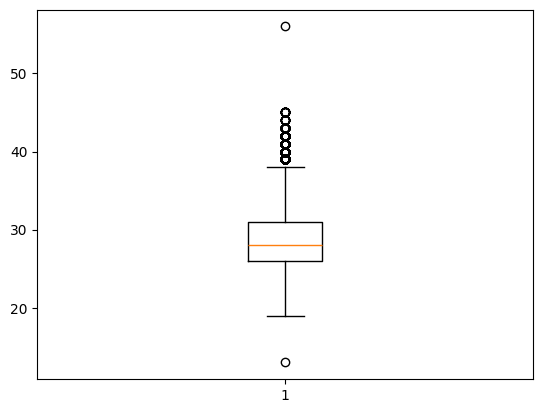

In [261]:
stats(races["cyclist_age"], box=True)

In [262]:
stats(races["is_tarmac"])

Description of attribute 'is_tarmac':


count     589865
unique         2
top         True
freq      536042
Name: is_tarmac, dtype: object


Unique values:
[ True False]

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
is_tarmac
True     536042
False     53823
Name: count, dtype: int64


In [263]:
stats(races["is_cobbled"])

Description of attribute 'is_cobbled':


count     589865
unique         1
top        False
freq      589865
Name: is_cobbled, dtype: object


Unique values:
[False]

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
is_cobbled
False    589865
Name: count, dtype: int64


In [264]:
stats(races["is_gravel"])

Description of attribute 'is_gravel':


count     589865
unique         1
top        False
freq      589865
Name: is_gravel, dtype: object


Unique values:
[False]

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
is_gravel
False    589865
Name: count, dtype: int64


In [265]:
stats(races["cyclist_team"])

Description of attribute 'cyclist_team':


count                              430704
unique                                 91
top       liberty-seguros-wurth-team-2005
freq                                 8869
Name: cyclist_team, dtype: object


Unique values:
['vini-ricordi-pinarello-sidermec-1986' 'norway-1987' nan
 'navigare-blue-storm-1993' 'spain-1991' 'kelme-costa-blanca-2000'
 'japan-2008' 'ville-de-charleroi-new-systems-2000' 'switzerland-1997'
 'germany-2004' 'hungary-2002' 'radio-popular-paredes-boavista-2023'
 'new-zealand-1991' 'canada-1996' 'linea-md-italia-maggi-mobili-1985'
 'kazakhstan-2019' 'kondor-1979' 'mexico-1986' 'spar-rdm-1999'
 'o.n.c.e.-deutsche-bank-2000' 'rally-cycling-2021'
 'euskaltel-euskadi-2010' 'ceramica-panaria-navigare-2007'
 'united-states-1998' 'carlos-cycles-1975' 'ireland-2005'
 'team-saxo-bank-tinkoff-bank-2012' 'south-africa-1993'
 'liberty-seguros-wurth-team-2005' 'del-tongo-1986'
 'team-giant-shimano-2014' 'bora-hansgrohe-2021' 'france-1978'
 'australia-1991' 'teka-1988' 'cantanhede-marques-de-marialva-2003'
 'jolly-ceramica-1977' 'canada-2020' 'netherlands-1974' 'atala-1985'
 'czechoslovakia-1987' 'carrera-inoxpran-1985' 'luxembourg-2013'
 'denmark-1991' 'euskaltel-euskadi-2012' 'co

Description of attribute 'delta':


count    589865.000000
mean        418.292794
std         842.961596
min       -6906.000000
25%          10.000000
50%         156.000000
75%         624.000000
max       61547.000000
Name: delta, dtype: float64


Unique values:
[0.0000e+00 2.7000e+01 6.4000e+01 ... 2.4264e+04 3.4523e+04 3.4522e+04]

Number of null values: 0

0 null values over 589865 records - (0.00%)

Top 5 common value:
delta
0.0    120546
2.0      3700
5.0      3353
3.0      3178
4.0      3036
Name: count, dtype: int64

Outliers: [np.float64(-2635.0), np.float64(-2638.0), np.float64(-2541.0), np.float64(-2542.0), np.float64(-2545.0), np.float64(-2546.0), np.float64(-2550.0), np.float64(-2560.0), np.float64(-2564.0), np.float64(-2567.0), np.float64(-2567.0), np.float64(-2574.0), np.float64(-2469.0), np.float64(-2473.0), np.float64(-2475.0), np.float64(-2477.0), np.float64(-2479.0), np.float64(-2481.0), np.float64(-2482.0), np.float64(-2485.0), np.float64(-2486.0), np.float64(-2486.0), np.float64(-2487.0), np.float64(-2500.0), np.float64(-2504.0), np.float64(-2505.0), np.float64(-2509.0), np.float64(-2510.0), np.float64(-2513.0), np.float64(-2514.0), np.float64(-2408.0), np.float64(-2410.0), np.float64(-2413.0), np.float64(-2

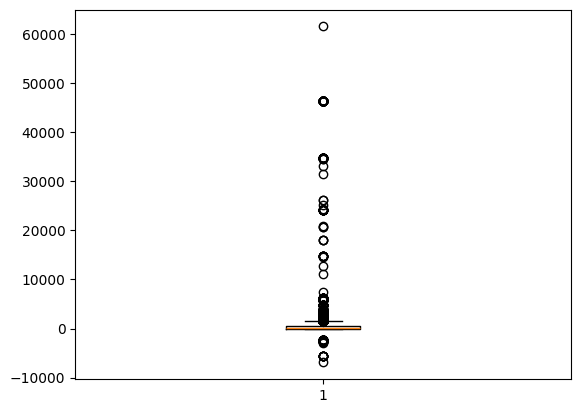

In [266]:
stats(races["delta"], box=True)

In [267]:
races[races["_url"].str.startswith('vuelta-a-espana/1996/stage')]

_url             name  points  uci_points  \
39150   vuelta-a-espana/1996/stage-14  Vuelta a España    80.0         NaN   
39151   vuelta-a-espana/1996/stage-14  Vuelta a España    80.0         NaN   
39152   vuelta-a-espana/1996/stage-14  Vuelta a España    80.0         NaN   
39153   vuelta-a-espana/1996/stage-14  Vuelta a España    80.0         NaN   
39154   vuelta-a-espana/1996/stage-14  Vuelta a España    80.0         NaN   
...                               ...              ...     ...         ...   
507949  vuelta-a-espana/1996/stage-13  Vuelta a España    80.0         NaN   
507950  vuelta-a-espana/1996/stage-13  Vuelta a España    80.0         NaN   
507951  vuelta-a-espana/1996/stage-13  Vuelta a España    80.0         NaN   
507952  vuelta-a-espana/1996/stage-13  Vuelta a España    80.0         NaN   
507953  vuelta-a-espana/1996/stage-13  Vuelta a España    80.0         NaN   

          length  climb_total  profile  startlist_quality  \
39150   202600.0       3067.0      NaN                988   
39151   202600.0       3067.0      NaN                988   
39152   202600.0       3067.0      NaN                988   
39153   202600.0       3067.0      NaN                988   
39154   202600.0       3067.0      NaN                988   
...          ...          ...      ...                ...   
507949  159000.0       3051.0      NaN                988   
507950  159000.0       3051.0      NaN                988   
507951  159000.0       3051.0      NaN                988   
507952  159000.0       3051.0      NaN                988   
507953  159000.0       3051.0      NaN                988   

        average_temperature                 date  position  \
39150                   NaN  1996-09-21 04:48:14         0   
39151                   NaN  1996-09-21 04:48:14         1   
39152                   NaN  1996-09-21 04:50:11         2   
39153                   NaN  1996-09-21 04:50:11         3   
39154                   NaN  1996-09-21 04:50:11         4   
...                     ...                  ...       ...   
507949                  NaN  1996-09-20 04:24:29       137   
507950                  NaN  1996-09-20 04:25:04       138   
507951                  NaN  1996-09-20 04:25:04       139   
507952                  NaN  1996-09-20 04:26:03       140   
507953                  NaN  1996-09-20 04:26:49       141   

                         cyclist  cyclist_age  is_tarmac  is_cobbled  \
39150               biagio-conte         28.0       True       False   
39151   orlando-sergio-rodrigues         27.0       True       False   
39152             laurent-dufaux         27.0       True       False   
39153           laurent-jalabert         28.0       True       False   
39154                 alex-zulle         28.0       True       False   
...                          ...          ...        ...         ...   
507949      lorenzo-di-silvestro         26.0       True       False   
507950    marco-antonio-di-renzo         27.0       True       False   
507951             juri-recanati         26.0       True       False   
507952            hendrik-redant         34.0       True       False   
507953            eddy-mazzoleni         23.0       True       False   

        is_gravel                    cyclist_team   delta  
39150       False                             NaN     0.0  
39151       False                             NaN     0.0  
39152       False    bankgiroloterij-batavus-2000   117.0  
39153       False             team-volksbank-2008   117.0  
39154       False             team-volksbank-2008   117.0  
...           ...                             ...     ...  
507949      False                             NaN  1361.0  
507950      False                             NaN  1396.0  
507951      False                             NaN  1396.0  
507952      False                     norway-1987  1455.0  
507953      False  ceramica-panaria-navigare-2007  1501.0  

[3100 rows x 18 columns]

# Data quality

## Age

Il box plot relativo a questo attributo, mostrava la presenza di diversi outliers, in particolare ci siamo focalizzati su due di questi, con valori rispettivamente di 13 e 56.

In [268]:
races[(races['cyclist_age'] == 13) | (races['cyclist_age'] == 56)]


_url                            name  points  \
114525  vuelta-a-espana/1996/stage-1                 Vuelta a España    80.0   
294489     san-sebastian/2001/result  Clasica Ciclista San Sebastian   225.0   

        uci_points    length  climb_total  profile  startlist_quality  \
114525         NaN  162000.0        862.0      NaN                988   
294489         NaN  227000.0          NaN      2.0               1048   

        average_temperature                 date  position  \
114525                  NaN  1996-09-07 03:52:27       129   
294489                  NaN  2001-08-11 05:28:57        91   

                       cyclist  cyclist_age  is_tarmac  is_cobbled  is_gravel  \
114525  jose-azevedo-goncalves         56.0       True       False      False   
294489           plamen-stanev         13.0      False       False      False   

       cyclist_team  delta  
114525          NaN    0.0  
294489          NaN  663.0

Considerato che il dataset "cyclists" riporta l'anno di nascita del ciclista "planem-stanev" (1988), e che l'unica gara a cui ha partecipato si è tenuta nel 2001, di conseguenza l'età (13) che presentava in quella gara coincide con quella indicata nel dataset.

Di seguito verifichiamo che ci sia consistenza tra l'anno di nascita indicata nel dataset "cyclists" e l'età durante la partecipazione alla gara indicata nel dataset "races".

## SCRIVERE ALGORITMO CHE CONTROLLA CONSISTENZA ETA TRA TUTTI I CICLISTI

In [269]:
cyclists = pd.read_csv('../dataset/cyclists.csv')


## Name

Alcuni nomi di gare differiscono per singoli caratteri

In [270]:
unique_names=races['name'].unique()
sorted(unique_names)

['Amstel Gold Race',
 'Clasica Ciclista San Sebastian',
 'Clásica Ciclista San Sebastian',
 'Clásica Ciclista San Sebastián',
 'Clásica San Sebastián',
 'Criterium du Dauphiné',
 'Criterium du Dauphiné Libére',
 'Critérium du Dauphiné',
 'Critérium du Dauphiné Libéré',
 'Donostia San Sebastian Klasikoa',
 'Dwars door België / À travers la Belgique',
 'Dwars door Vlaanderen',
 'Dwars door Vlaanderen - A travers la Flandre ME',
 'Dwars door Vlaanderen / A travers la Flandre',
 'Dwars door Vlaanderen / A travers la Flandre ME',
 'E3 BinckBank Classic',
 'E3 Harelbeke',
 'E3 Prijs Vlaanderen',
 'E3 Prijs Vlaanderen - Harelbeke',
 'E3 Saxo Bank Classic',
 'E3 Saxo Classic',
 'E3-Prijs Harelbeke',
 "Giro d'Italia",
 'Giro di Lombardia',
 'Gran Camiño',
 'Grand Prix Cycliste de Montréal',
 'Grand Prix Cycliste de Quebec',
 'Grand Prix Cycliste de Québec',
 'Il Lombardia',
 'Itzulia Basque Country',
 'La Flèche Wallonne',
 'La Vuelta ciclista a España',
 'Liège - Bastogne - Liège',
 'Liège-Bas

## Delta 

- Alcuni delta negativi
- Primi classificati con delta diverso da 0 
- Inconsistenza tra la semantica della colonna e i valori effettivamente indicati

In [271]:
neg = races[races['delta'] < 0]['delta']
len(neg)

86

In [272]:
races[(races['position'] == 1) & (races['delta'] != 0)]

_url                           name  \
107       vuelta-a-espana/2016/stage-14                Vuelta a España   
427     volta-a-catalunya/1999/prologue     Volta Ciclista a Catalunya   
546         tour-de-france/2022/stage-9                 Tour de France   
710       vuelta-a-espana/2017/stage-20                Vuelta a España   
867        tour-de-france/1978/stage-14                 Tour de France   
...                                 ...                            ...   
588001            dauphine/2015/stage-6          Critérium du Dauphiné   
588146          paris-nice/2000/stage-3                   Paris - Nice   
588251            gp-quebec/2010/result  Grand Prix Cycliste de Quebec   
589398        paris-roubaix/2000/result                Paris - Roubaix   
589669       giro-d-italia/2010/stage-1                  Giro d'Italia   

        points  uci_points    length  climb_total  profile  startlist_quality  \
107       80.0       100.0  196000.0       5575.0      5.0                821   
427       50.0         NaN    8100.0          NaN      NaN                804   
546      100.0       120.0  192900.0       3743.0      3.0               1551   
710       80.0       100.0  117500.0       3817.0      5.0                899   
867      100.0         NaN   52000.0       1351.0      5.0               1241   
...        ...         ...       ...          ...      ...                ...   
588001    50.0         6.0  183000.0       3562.0      5.0                997   
588146    50.0         NaN  178000.0          NaN      NaN                880   
588251   225.0         NaN  189000.0          NaN      3.0                824   
589398   275.0         NaN  273000.0          NaN      1.0                808   
589669    80.0        16.0    8400.0         60.0      1.0                878   

        average_temperature                 date  position  \
107                     NaN  2016-09-03 05:43:31         1   
427                     NaN  1999-06-17 00:10:15         1   
546                    24.0  2022-07-10 04:47:01         1   
710                     NaN  2017-09-09 03:31:50         1   
867                     NaN  1978-07-14 01:26:37         1   
...                     ...                  ...       ...   
588001                  NaN  2015-06-12 04:29:28         1   
588146                  NaN  2000-03-08 04:28:45         1   
588251                  NaN  2010-09-10 04:35:28         1   
589398                  NaN  2000-04-10 06:47:15         1   
589669                  NaN  2010-05-08 00:10:20         1   

                     cyclist  cyclist_age  is_tarmac  is_cobbled  is_gravel  \
107          kenny-elissonde         25.0       True       False      False   
427           andrea-peron-1         28.0       True       False      False   
546     jonathan-castroviejo         35.0       True       False      False   
710               wout-poels         30.0       True       False      False   
867        michel-pollentier         27.0       True       False      False   
...                      ...          ...        ...         ...        ...   
588001       vincenzo-nibali         31.0       True       False      False   
588146     rinaldo-nocentini         23.0       True       False      False   
588251  edvald-boasson-hagen         23.0      False       False      False   
589398     peter-van-petegem         30.0      False       False      False   
589669      brent-bookwalter         26.0       True       False      False   

                                cyclist_team  delta  
107                              canada-1996    7.0  
427                                      NaN    3.0  
546                             denmark-2016   22.0  
710                    lotto-super-club-1991   17.0  
867     vini-ricordi-pinarello-sidermec-1986   46.0  
...                                      ...    ...  
588001                  ag2r-prevoyance-2001    5.0  
588146                         liquigas-2007   

## is_gravel, is_tarmac, is_cobbled


Righe in cui tutti e 3 sono settati su false. Vuol dire che è un missing values?

In [273]:
races[(races['is_gravel'] == False) & (races['is_tarmac'] == False) & (races['is_cobbled'] == False)]

_url  \
1269    ronde-van-vlaanderen/1980/result   
1270    ronde-van-vlaanderen/1980/result   
1271    ronde-van-vlaanderen/1980/result   
1272    ronde-van-vlaanderen/1980/result   
1273    ronde-van-vlaanderen/1980/result   
...                                  ...   
589458         paris-roubaix/2000/result   
589459         paris-roubaix/2000/result   
589460         paris-roubaix/2000/result   
589461         paris-roubaix/2000/result   
589462         paris-roubaix/2000/result   

                                            name  points  uci_points  \
1269    Ronde van Vlaanderen / Tour des Flandres   275.0         NaN   
1270    Ronde van Vlaanderen / Tour des Flandres   275.0         NaN   
1271    Ronde van Vlaanderen / Tour des Flandres   275.0         NaN   
1272    Ronde van Vlaanderen / Tour des Flandres   275.0         NaN   
1273    Ronde van Vlaanderen / Tour des Flandres   275.0         NaN   
...                                          ...     ...         ...   
589458                           Paris - Roubaix   275.0         NaN   
589459                           Paris - Roubaix   275.0         NaN   
589460                           Paris - Roubaix   275.0         NaN   
589461                           Paris - Roubaix   275.0         NaN   
589462                           Paris - Roubaix   275.0         NaN   

          length  climb_total  profile  startlist_quality  \
1269    265000.0          NaN      NaN                602   
1270    265000.0          NaN      NaN                602   
1271    265000.0          NaN      NaN                602   
1272    265000.0          NaN      NaN                602   
1273    265000.0          NaN      NaN                602   
...          ...          ...      ...                ...   
589458  273000.0          NaN      1.0                808   
589459  273000.0          NaN      1.0                808   
589460  273000.0          NaN      1.0                808   
589461  273000.0          NaN      1.0                808   
589462  273000.0          NaN      1.0                808   

        average_temperature                 date  position  \
1269                    NaN  1980-03-30 06:36:45         0   
1270                    NaN  1980-03-30 06:36:45         1   
1271                    NaN  1980-03-30 06:36:45         2   
1272                    NaN  1980-03-30 06:37:05         3   
1273                    NaN  1980-03-30 06:37:05         4   
...                     ...                  ...       ...   
589458                  NaN  2000-04-10 07:06:30        61   
589459                  NaN  2000-04-10 07:06:30        62   
589460                  NaN  2000-04-10 07:06:30        63   
589461                  NaN  2000-04-10 07:06:30        64   
589462                  NaN  2000-04-10 07:06:30        65   

                   cyclist  cyclist_age  is_tarmac  is_cobbled  is_gravel  \
1269     michel-pollentier         29.0      False       False      False   
1270       francesco-moser         29.0      False       False      False   
1271              jan-raas         28.0      False       False      False   
1272    roger-de-vlaeminck         33.0      False       False      False   
1273          marc-demeyer         30.0      False       False      False   
...                    ...          ...        ...         ...        ...   
589458    thierry-gouvenou         31.0      False       False      False   
589459        thor-hushovd         22.0      False       False      False   
589460       franck-perque         26.0      False       False      False   
589461       mathew-hayman         22.0      False       False      False   
589462     fabien-de-waele         25.0      False       False      False   

                           cyclist_team   delta  
1269                     australia-1983     0.0  
1270                         japan-2008     0.0  
1271    liberty-seguros-wurth-team-2005     0.0  
1272                      liquigas-2007

- Alcune di queste colonne presentano tutti valori false/true -> potrebbe essere inutile

In [274]:
races[(races['is_gravel'] == True) | (races['is_cobbled'] == True)].shape[0]


0

## Average Temperature

Questa feature presenta circa il 95% di valori nulli, dunque non determinante ai fini delle nostre analisi. 

In [275]:
null_values = len(races[races['average_temperature'].isna()])
print((null_values/races.shape[0])*100)

94.92544904342519


## Points e UCI_points


- Spiegare differenza
- Dire che uci_points presenta la maggior parte di valori nulli, e quindi può essere droppato
  

## Race attributes


Come prima cosa distingurei i valori delle singole corse con i dati relativi ai ciclisti della corsa per cercare di rimuovere ridondanza dei dati che potrebbe falsare le nostre distribuzioni a favore dei valori delle corse con più ciclisti -> separiamo in due tabelle normalizzate

In [276]:
# count the frequence of each distinct _url
values_count = races_data['_url'].value_counts()
# if a race has a frequency > 1 then this race may represent an inconsistency between the race's attributes
inconsistent_urls = values_count[values_count > 1]
len(inconsistent_urls)

0

## Length


In [293]:
temp = races[races['length'] <= 10000]
temp['_url'].value_counts()

_url
tour-de-france/1986/prologue       210
tour-de-france/1987/prologue       207
giro-d-italia/2012/stage-1         198
tour-de-france/1992/prologue       198
tour-de-france/1997/prologue       198
                                  ... 
tour-de-romandie/1977/prologue       5
tour-de-romandie/1983/prologue       5
tour-de-romandie/1989/prologue       5
tirreno-adriatico/1992/prologue      5
tour-de-romandie/1981/prologue       3
Name: count, Length: 249, dtype: int64

Spiegare che abbiamo trovato dalla distribuzione che molte gare hanno una lunghezza breve, e quindi abbiamo cercato di verificare se ci fosse un errore di scala, oppure se ci sono effettivamente gare/tappe di lunghezza molto breve.

Abbiamo riscontrato che le gare di lunghezza più breve, contengono prologue nell'url (e forse stage-1), e ottenuto conferma che esista effettivamente la tappa iniziale chiamata prologo, di una lunghezza dai 1000 ai 10000 circa metri.


In [303]:
unique_subset = races[races['_url'].str.contains("prologue")][['_url', 'length']].drop_duplicates(subset=['_url'])
unique_subset.describe()

length
count    181.000000
mean    5745.414365
std     1913.273655
min     1000.000000
25%     4100.000000
50%     5700.000000
75%     7000.000000
max    10200.000000

# Correlazione attributi

In [277]:
numeric_races_data = races_data.select_dtypes(include="number")
numeric_races_data.corr()

points  uci_points    length  climb_total   profile  \
points               1.000000    0.886923  0.443933     0.148629 -0.130689   
uci_points           0.886923    1.000000  0.308246     0.112018 -0.095515   
length               0.443933    0.308246  1.000000     0.530568  0.070214   
climb_total          0.148629    0.112018  0.530568     1.000000  0.699948   
profile             -0.130689   -0.095515  0.070214     0.699948  1.000000   
startlist_quality    0.150258   -0.027519  0.075864     0.040131 -0.068754   
average_temperature -0.145383   -0.207581 -0.078542    -0.133245  0.008744   

                     startlist_quality  average_temperature  
points                        0.150258            -0.145383  
uci_points                   -0.027519            -0.207581  
length                        0.075864            -0.078542  
climb_total                   0.040131            -0.133245  
profile                      -0.068754             0.008744  
startlist_quality             1.000000             0.352969  
average_temperature           0.352969             1.000000

La correlazione tra points e uci_points è molto alta, facciamo uno scatterplot

In [278]:
seaborn.scatterplot(data=races_data, x="points", y="uci_points")

NameError: name 'seaborn' is not defined